<a href="https://colab.research.google.com/github/antoreep-jana/YouTube_Code_Repositories/blob/main/Weekly%20Sessions/Weekly_Session_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DenseNet Architecture

In [ ]:
import tensorflow as tf

In [ ]:
def bn_rl_conv(x, filters, kernel = 1, strides = 1):
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.ReLU()(x)
  x = tf.keras.layers.Conv2D(filters, kernel_size= kernel, strides = strides, padding = 'same')(x)

  return x

In [ ]:
def dense_block(x, repetition):
  for _ in range(repetition):
    y = bn_rl_conv(x, 4 * filters)
    y = bn_rl_conv(x, filters, 3)

    x = tf.keras.layers.concatenate([y, x])

  return x



In [ ]:
import tensorflow.keras.backend as K

def transition_layer(x):
  
  x = bn_rl_conv(x, K.int_shape(x)[-1] // 2, kernel = 1, strides = 1)

  x = tf.keras.layers.AveragePooling2D((2,2), strides = 2, padding = 'same')(x)


  return x

In [ ]:
inp = tf.keras.layers.Input(shape = (224,224,3))

x = tf.keras.layers.Conv2D(64, (7,7), 2, padding = 'same')(inp)
x = tf.keras.layers.MaxPooling2D((3,3), 2, padding = 'same')(x)

print(x.shape)


filters = 32

for repetition in [6, 12, 24]:

  dense = dense_block(x, repetition)
  x = transition_layer(dense)


# call for the 16th 
x = dense_block(x, 16)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(1000, activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = inp, outputs = output)

model.summary()


(None, 56, 56, 64)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 112, 112, 64) 9472        input_6[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_17[0][0]                  
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 56, 56, 64)   256         max_pooling2d_5[0][0]            
___________________________________________________________________________

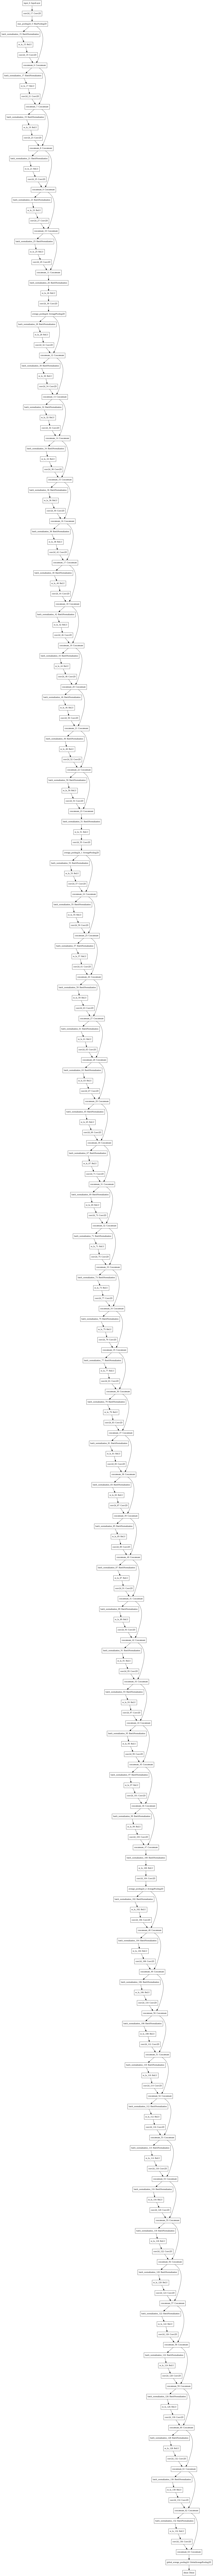

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)